In [2]:
from tensorflow.keras.datasets import  cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

### <span style="color: #BFFF00;">Load and Visualize Dataset

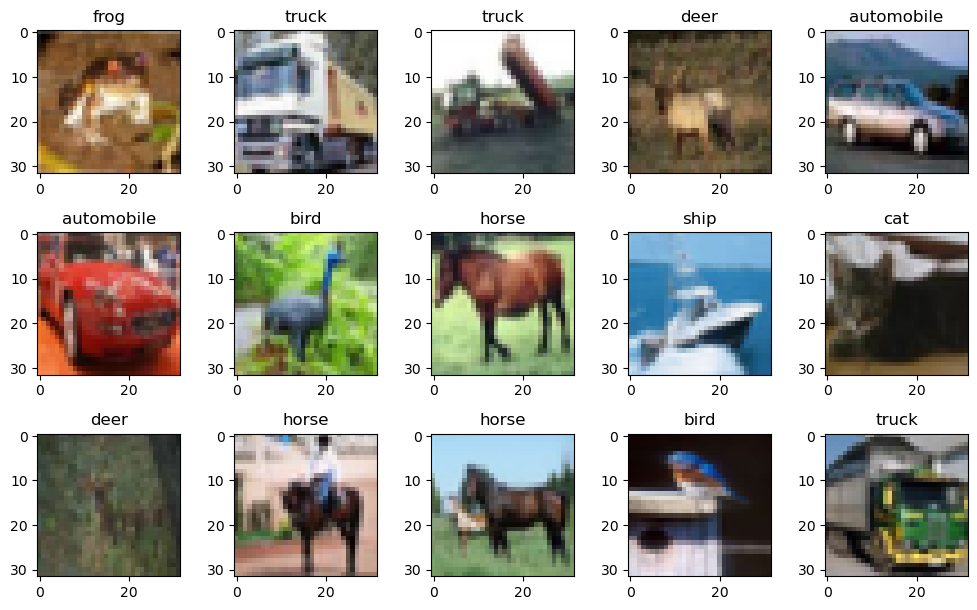

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

# Loop through the first 15 images and display them in a 5x5 grid

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


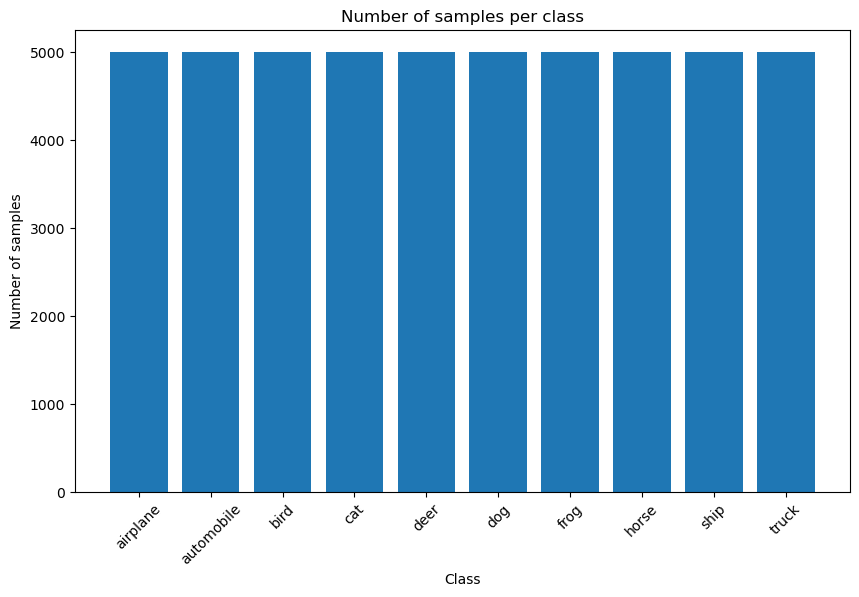

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [4]:
from collections import Counter

labels = y_train.flatten()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


### <span style="color: #BFFF00;">Data Preprocessing

Before training, we need to prepare our data to fit the model:
1. **Reshape** the input images to add the channel dimension expected by CNNs.
2. **Normalize** pixel values to the [0, 1] range to speed up training.
3. **Encode** the labels using one-hot encoding for categorical classification.

We will use the `Rescaling` and `to_categorical` utilities provided by Keras.

In [5]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling

# Reshape to add channel dimension
# 3 channels since images are colored
X_train = tf.reshape(X_train, [-1, 32, 32, 3])
X_test = tf.reshape(X_test, [-1, 32, 32, 3])

# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

### <span style="color: #BFFF00;">Model Architecture

#### <span style="color: #00FFFF;"> Build CNN Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    # Input shape is 32x32 pixels with 3 color channels (RGB)
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

- **Layer Types:**
  - `Conv2D`: Convolutional layers that apply filters to the input image to detect features.
  - `MaxPooling2D`: Downsamples the spatial dimensions, reducing width and height.
  - `Flatten`: Converts the 2D feature maps into a 1D vector to feed into dense layers.
  - `Dense`: Fully connected layers that learn to classify based on extracted features.

- **Output Shape:**
  - The shape of the data after passing through each layer.
  - `None` means batch size can vary.
  - For example, `(None, 30, 30, 32)` means each image is transformed to 30x30 pixels with 32 feature maps.

- **Number of Parameters (Param #):**
  - These are the trainable weights and biases the model learns.
  - For example, the first Conv2D layer has 896 parameters (weights + biases).
  - Layers like MaxPooling have zero parameters because they perform fixed operations (like downsampling).

- **Total Parameters:**
  - The model has **315,722** trainable parameters in total.
  - This gives a sense of model complexity — more parameters often means a more powerful model but also higher risk of overfitting and longer training time.


### <span style="color: #BFFF00;">Model Training

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4572 - loss: 1.5061 - val_accuracy: 0.5260 - val_loss: 1.3464
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5943 - loss: 1.1535 - val_accuracy: 0.6144 - val_loss: 1.1099
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6405 - loss: 1.0274 - val_accuracy: 0.6309 - val_loss: 1.0638
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6765 - loss: 0.9277 - val_accuracy: 0.6521 - val_loss: 1.0119
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7034 - loss: 0.8466 - val_accuracy: 0.6722 - val_loss: 0.9433
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7279 - loss: 0.7775 - val_accuracy: 0.6722 - val_loss: 0.9616
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7454 - loss: 0.7192 - val_accuracy: 0.6793 - val_loss: 0.9672
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7737 - loss: 0.6485 - 

### <span style="color: #BFFF00;">Model Evaluation

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6748
Precision: 0.6841
Recall: 0.6748
F1 Score: 0.6761


In [9]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.75      0.70      0.73      1000
  automobile       0.83      0.74      0.79      1000
        bird       0.56      0.56      0.56      1000
         cat       0.45      0.51      0.48      1000
        deer       0.66      0.58      0.62      1000
         dog       0.56      0.61      0.59      1000
        frog       0.66      0.85      0.74      1000
       horse       0.82      0.64      0.72      1000
        ship       0.77      0.81      0.79      1000
       truck       0.77      0.75      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.68     10000



**Class-by-Class Insights**

| Class         | Precision | Recall | F1-score | Support | Interpretation |
|---------------|-----------|--------|----------|---------|----------------|
| **airplane** | 0.74      | 0.73   | 0.74     | 1000    | High precision, but the model sometimes misses actual airplanes 
| **automobile**     | 0.81      | 0.81   | 0.81     | 1000    | Excellent performance. The model is very good at detecting automobiles, though it sometimes confuses other objects with them. |
| **bird**    | 0.53     | 0.67   | 0.59     | 1000    | Very poor performance. The model struggles to identify birds and often confuses them with other classes. |
| **cat**       | 0.50      | 0.50   | 0.50     | 1000    | The worst performance. The model struggles to consistently identify cats. |
| **deer**        | 0.66      | 0.62   | 0.64     | 1000    | Average performance. The model has a decent balance between precision and the ability to detect deer. 
| **dog**      | 0.59      | 0.58   | 0.59     | 1000    | Weak performance. The model has low precision when classifying dogs and misses many of them. |
| **frog**       | 0.81     | 0.75   | 0.78     | 1000    | Very good and consistent performance. The model is highly accurate and detects frogs well. 
| **horse**     | 0.79      | 0.70   | 0.74     | 1000    | Solid and consistent performance. The model classifies horses well. |
| **ship**         | 0.83      | 0.78   | 0.81     | 1000    | Excellent performance. The model is very good at detecting most ships. |
| **truck**  | 0.76      | 0.80   | 0.78     | 1000    | Very good performance. The model consistently and accurately classifies trucks. |


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


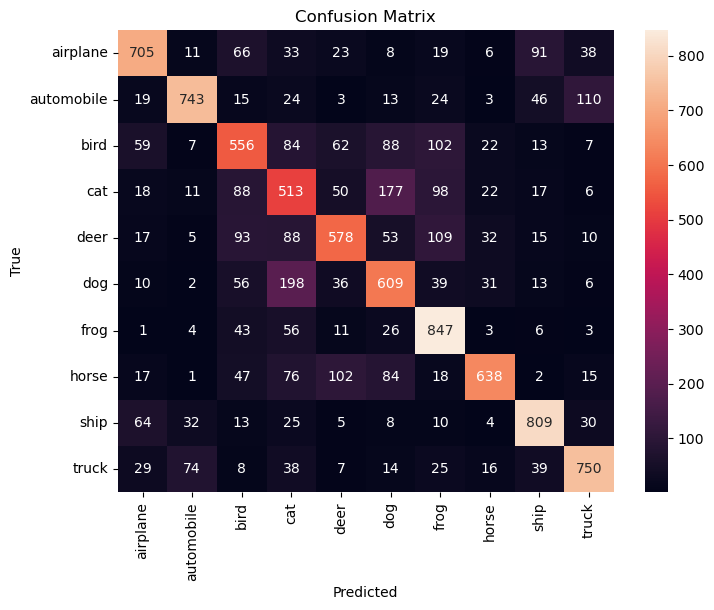

In [10]:

from sklearn.metrics import confusion_matrix

# Predict & confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix reveals common misclassifications between visually similar classes:

* cat vs. dog: This is the most significant confusion. The model misclassifies 187 dogs as cats and 123 cats as dogs, indicating a major challenge in differentiating these two classes.

* automobile vs. truck: The model shows a clear tendency to mistake trucks for automobiles (76 times), while the opposite confusion is much lower (11 times).

* bird vs. deer: The model frequently confuses birds with deer (77 times), a notable misclassification that suggests an unexpected visual similarity in how the model interprets these two classes.

* frog vs. bird: There is a significant one-way confusion where frogs are often misclassified as birds (91 times), but not vice versa (7 times).

* airplane vs. bird: The model frequently mistakes birds for airplanes (82 times), while the opposite happens less often (24 times).

These confusions highlight the model's key weaknesses in differentiating between visually similar categories.

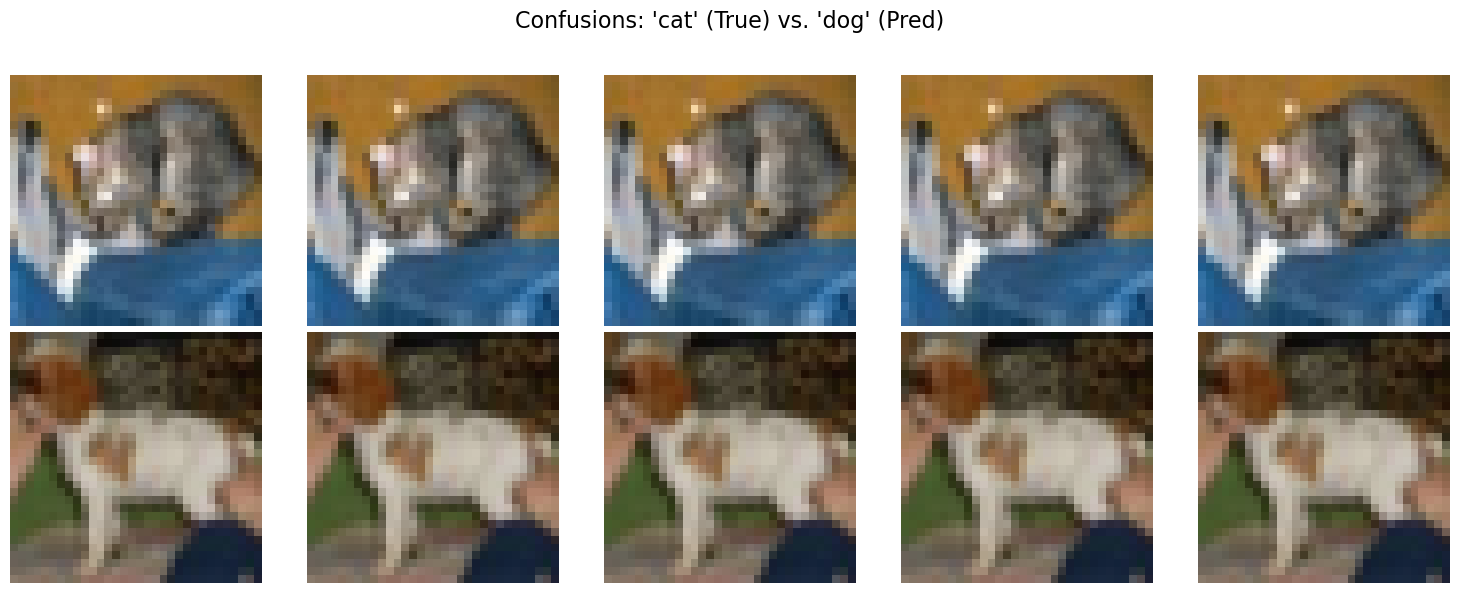

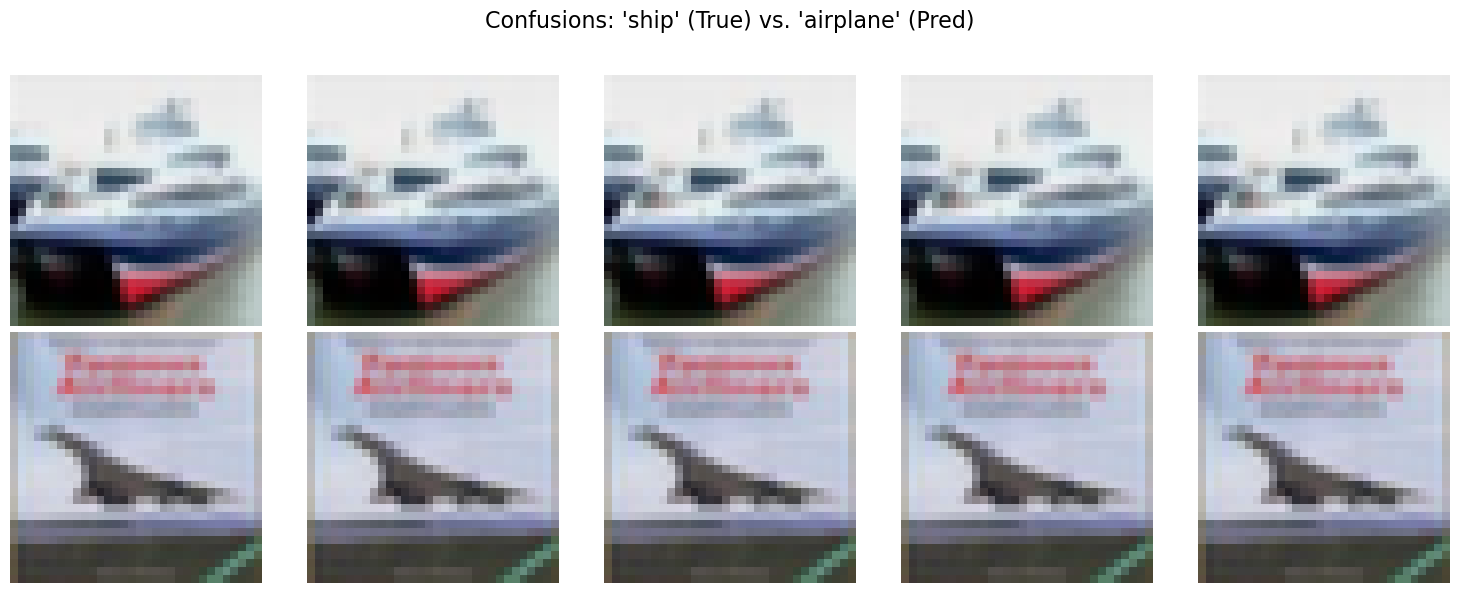

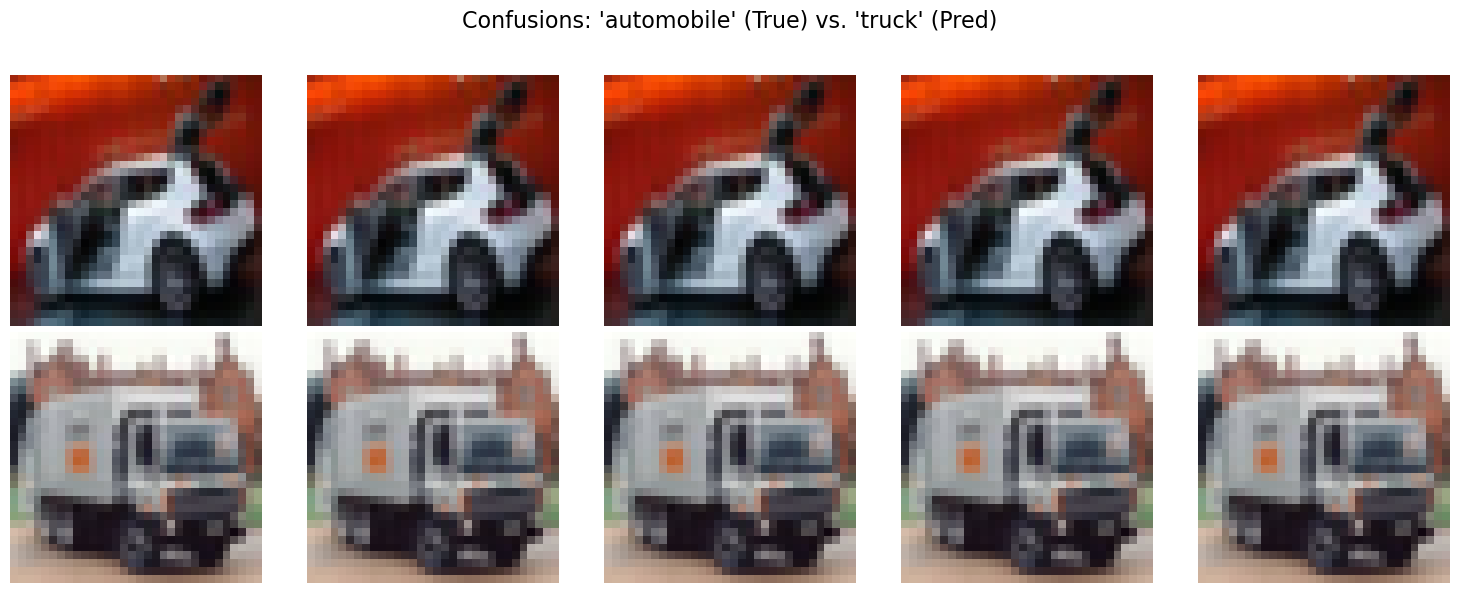

In [11]:
# Make sure y_pred and y_true are numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
# Convert x_test to a NumPy array if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test
# Confusing class pairs for CIFAR-10 to inspect
confusing_pairs = [
    (3, 5),  # cat vs dog
    (8, 0),  # ship vs airplane
    (1, 9)   # automobile vs truck
]
# Function to plot misclassified images
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    # Find indices of misclassified images
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]
    fig, axes = plt.subplots(2, n, figsize=(15, 6)) # Increased vertical size slightly
    fig.suptitle(f"Confusions: '{class_names[class1]}' (True) vs. '{class_names[class2]}' (Pred)", fontsize=16)
    # Plot examples for the first type of confusion
    axes[0, 0].set_ylabel(f"True: {class_names[class1]}\nPred: {class_names[class2]}", rotation=0, size='large', labelpad=60)
    for i in range(n):
        ax = axes[0, i]
        if i < len(idx_confused_1):
            # THE FIX: Remove .reshape() and cmap='gray' for color images
            ax.imshow(X[idx_confused_1[i]])
            ax.axis('off')
        else:
            ax.axis('off') # Hide unused subplots
    # Plot examples for the second type of confusion
    axes[1, 0].set_ylabel(f"True: {class_names[class2]}\nPred: {class_names[class1]}", rotation=0, size='large', labelpad=60)
    for i in range(n):
        ax = axes[1, i]
        if i < len(idx_confused_2):
            # THE FIX: Remove .reshape() and cmap='gray' for color images
            ax.imshow(X[idx_confused_2[i]])
            ax.axis('off')
        else:
            ax.axis('off') # Hide unused subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
    plt.show()
    
# Show misclassifications for each confusing pair
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true, y_pred, X_test_np, class1, class2)

### <span style="color: #BFFF00;">Improving the Model: More Layers and Data Augmentation

#### <span style="color: #00FFFF;">Adding More Layers to the CNN

Adding more convolutional layers and dense layers can help the model learn more complex features from the images. Deeper models can extract higher-level patterns, which often improves accuracy — but they may also increase training time and risk of overfitting if not carefully managed.

**Key points:**
- More convolutional layers let the network detect more detailed features.
- Additional dense layers can improve classification power.
- Use techniques like dropout or batch normalization to reduce overfitting.

In [12]:
# Define deeper CNN model
model_more_layers = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_more_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train on original data
history_more_layers = model_more_layers.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with more layers: {accuracy:.4f}")


Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3931 - loss: 1.6385 - val_accuracy: 0.5161 - val_loss: 1.3267
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5482 - loss: 1.2591 - val_accuracy: 0.5876 - val_loss: 1.1502
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6108 - loss: 1.0993 - val_accuracy: 0.6436 - val_loss: 1.0101
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6547 - loss: 0.9885 - val_accuracy: 0.6766 - val_loss: 0.9271
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6840 - loss: 0.9074 - val_accuracy: 0.6754 - val_loss: 0.9303
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7062 - loss: 0.8448 - val_accuracy: 0.7036 - val_loss: 0.8599
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7256 - loss: 0.7904 - val_accuracy: 0.7107 - val_loss: 0.8395
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7413 - loss: 0.7424 - val_accuracy: 

In [13]:
# Predict class probabilities
y_pred_probs = model_more_layers.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.7343
Precision: 0.7381
Recall: 0.7343
F1 Score: 0.7337


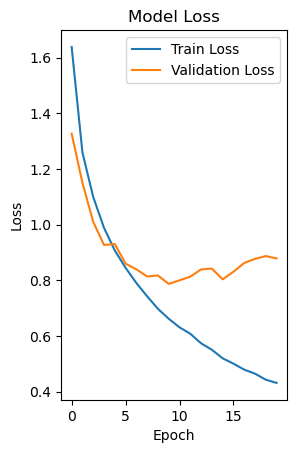

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history_more_layers.history['loss'], label='Train Loss')
plt.plot(history_more_layers.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### <span style="color: #00FFFF;">Adding More Layers to the CNN 2.0

In [15]:
# Convert the integer labels to a one-hot encoded format.
# This is required for the 'categorical_crossentropy' loss function.
# e.g., label '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

model_more_layers2 = Sequential([
    # Added padding='same' to preserve dimensions after convolution
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_more_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
history_more_layers2 = model_more_layers.fit(X_train, y_train_one_hot, 
                                            epochs=20, 
                                            batch_size=64, 
                                            validation_data=(X_test, y_test_one_hot))

# Evaluate the model using the one-hot encoded labels
loss, accuracy = model_more_layers.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy with more layers: {accuracy:.4f}")


Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8498 - loss: 0.4163 - val_accuracy: 0.7428 - val_loss: 0.8647
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8571 - loss: 0.3964 - val_accuracy: 0.7405 - val_loss: 0.9243
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8619 - loss: 0.3787 - val_accuracy: 0.7361 - val_loss: 0.9472
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8660 - loss: 0.3685 - val_accuracy: 0.7308 - val_loss: 0.9860
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8693 - loss: 0.3613 - val_accuracy: 0.7390 - val_loss: 0.9474
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8718 - loss: 0.3529 - val_accuracy: 0.7312 - val_loss: 0.9977
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8802 - loss: 0.3324 - val_accuracy: 0.7389 - val_loss: 0.9899
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8785 - loss: 0.3311 - val_accurac

In [16]:
# Predict class probabilities
y_pred_probs = model_more_layers2.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1 Score: 0.0182


c:\Users\naatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


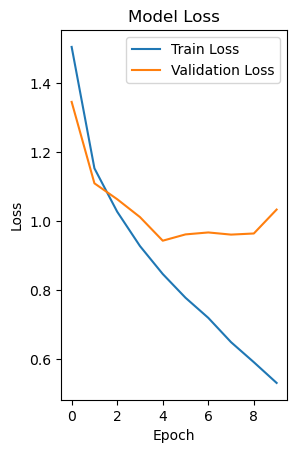

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Interpretation:

Initial Learning (Epochs 0-2): Both training and validation loss decrease sharply, showing the model is learning quickly.

Plateau (Epochs 3-6): The training loss continues to drop, but the validation loss flattens out, indicating a slowdown in the model's ability to generalize.

Overfitting (Epochs 7-9): The training loss keeps falling, but the validation loss begins to rise. This is a clear sign of overfitting, where the model is memorizing the training data instead of learning to generalize to new data

##### <span style="color: #00FFFF;">Adding Regularizer

In [18]:
from tensorflow.keras import regularizers

In [19]:
# Convert the integer labels to a one-hot encoded format.
# This is required for the 'categorical_crossentropy' loss function.
# e.g., label '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

wd = 1e-4

model_more_layers3 = Sequential([
    # Added padding='same' to preserve dimensions after convolution
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_more_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
history_more_layers3 = model_more_layers.fit(X_train, y_train_one_hot, 
                                            epochs=20, 
                                            batch_size=64, 
                                            validation_data=(X_test, y_test_one_hot))

# Evaluate the model using the one-hot encoded labels
loss, accuracy = model_more_layers.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy with more layers: {accuracy:.4f}")

c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9092 - loss: 0.2470 - val_accuracy: 0.7283 - val_loss: 1.3102
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9134 - loss: 0.2375 - val_accuracy: 0.7272 - val_loss: 1.3232
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9156 - loss: 0.2296 - val_accuracy: 0.7329 - val_loss: 1.2888
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9148 - loss: 0.2323 - val_accuracy: 0.7325 - val_loss: 1.3453
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9178 - loss: 0.2259 - val_accuracy: 0.7293 - val_loss: 1.3503
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9175 - loss: 0.2252 - val_accuracy: 0.7339 - val_loss: 1.2751
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9197 - loss: 0.2220 - val_accuracy: 0.7291 - val_loss: 1.4287
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9218 - loss: 0.2166 - v

In [20]:
# Predict class probabilities
y_pred_probs = model_more_layers3.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.1070
Precision: 0.0212
Recall: 0.1070
F1 Score: 0.0348


c:\Users\naatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


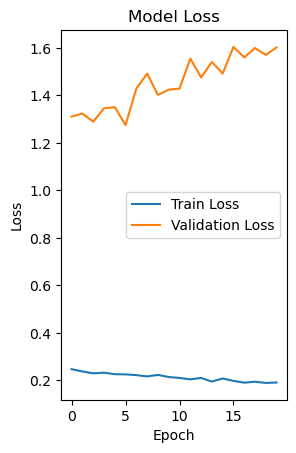

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history_more_layers3.history['loss'], label='Train Loss')
plt.plot(history_more_layers3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### <span style="color: #00FFFF;">Hyperparameters tuning - Early Stopping

##### What is Early Stopping?

Early stopping is a technique used to prevent overfitting during training by monitoring the model’s performance on a validation set. Instead of training for a fixed number of epochs, the training stops automatically when the model's validation loss stops improving for a specified number of consecutive epochs (called "patience").

**Why use early stopping?**

- Prevents the model from overfitting by stopping before the model starts to memorize training data.
- Saves training time by stopping when further improvement is unlikely.
- Helps find the optimal number of epochs without manual tuning.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

model_more_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

# Train the model with early stopping
history = model_more_layers.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")


Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9311 - loss: 0.1931 - val_accuracy: 0.7256 - val_loss: 1.6849
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9337 - loss: 0.1814 - val_accuracy: 0.7248 - val_loss: 1.7418
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9329 - loss: 0.1895 - val_accuracy: 0.7281 - val_loss: 1.7071
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9345 - loss: 0.1820 - val_accuracy: 0.7293 - val_loss: 1.6627
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9359 - loss: 0.1791 - val_accuracy: 0.7300 - val_loss: 1.6642
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9353 - loss: 0.1794 - val_accuracy: 0.7243 - val_loss: 1.7273
Epoch 7/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9360 - loss: 0.1790 - val_accuracy: 0.7345 - val_loss: 1.7267
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7293 - loss: 1.6627
Test accuracy w

#### <span style="color: #00FFFF;">Data Augmentation

Data augmentation artificially increases the size and diversity of the training dataset by applying random transformations such as rotations, flips, zooms, and shifts. This helps the model generalize better and reduces overfitting, often leading to improved accuracy.

**Key points:**
- Augmented data simulates variations the model might see in real-world inputs.
- Keras provides an easy way to apply data augmentation on the fly during training.
- Common augmentations include rotation, width/height shift, zoom, and horizontal flip.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Setup data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Train model using data augmentation
history_aug = model_more_layers.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)

# Evaluate
loss_aug, accuracy_aug = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with data augmentation: {accuracy_aug:.4f}")

Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6181 - loss: 1.1568 - val_accuracy: 0.7071 - val_loss: 0.9048
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6522 - loss: 1.0355 - val_accuracy: 0.6910 - val_loss: 0.9711
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6683 - loss: 0.9813 - val_accuracy: 0.7162 - val_loss: 0.8708
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6812 - loss: 0.9434 - val_accuracy: 0.7183 - val_loss: 0.8755
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6867 - loss: 0.9161 - val_accuracy: 0.7228 - val_loss: 0.8472
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6949 - loss: 0.8952 - val_accuracy: 0.7268 - val_loss: 0.8317
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7005 - loss: 0.8777 - val_accuracy: 0.7440 - val_loss: 0.7640
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7039 - loss: 0.8606 - val_accurac

### <span style="color: #BFFF00;">Transfer Learning

#### <span style="color: #00FFFF;">Import Libraries

In [25]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

#### <span style="color: #00FFFF;">Load the Preprocess Data

In [26]:
# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [27]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# Build TensorFlow datasets
batch_size = 64

def preprocess(image, label):
    image = tf.image.resize(image, (96, 96))       # resize here
    image = preprocess_input(image)                # mobilenet preprocess
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

#### <span style="color: #FFD1DC;">MobileNetV2 1.0

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

- Load the MobileNetV2 base model with pretrained ImageNet weights
- Set include_top=False to exclude the final classification layers
- Freeze the entire base model initially to train only the new top layers first

In [28]:
# Build transfer learning model
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [29]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # Pool spatial features into a vector
    layers.Dense(128, activation='relu'), # Fully connected layer to learn new patterns
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (Fashion MNIST)
])

##### <span style="color: #FFE5B4;">3. Compile the Model

In [30]:
# Compile model
# Compile the model with Adam optimizer and categorical crossentropy loss

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### <span style="color: #FFE5B4;">4. Train the Model

In [31]:
# Train
history = model.fit(train_ds, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 106ms/step - accuracy: 0.8253 - loss: 0.5100
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 151ms/step - accuracy: 0.8757 - loss: 0.3587
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 0.8953 - loss: 0.3033
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 190ms/step - accuracy: 0.9079 - loss: 0.2589
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 265ms/step - accuracy: 0.9223 - loss: 0.2206


##### <span style="color: #FFE5B4;">5. Evaluate the model

In [32]:
# Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print(f" Test accuracy: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.8658 - loss: 0.4275
 Test accuracy: 0.8658


In [33]:
# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step


In [34]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)                     # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)                  # predicted labels

# Get true labels from the dataset
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, digits=4))

157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step
              precision    recall  f1-score   support

           0     0.8396    0.9110    0.8739      1000
           1     0.9162    0.9400    0.9279      1000
           2     0.9046    0.8060    0.8525      1000
           3     0.7414    0.7800    0.7602      1000
           4     0.8294    0.8360    0.8327      1000
           5     0.8667    0.7670    0.8138      1000
           6     0.8771    0.9060    0.8913      1000
           7     0.8350    0.9260    0.8781      1000
           8     0.9516    0.8660    0.9068      1000
           9     0.9191    0.9200    0.9195      1000

    accuracy                         0.8658     10000
   macro avg     0.8681    0.8658    0.8657     10000
weighted avg     0.8681    0.8658    0.8657     10000



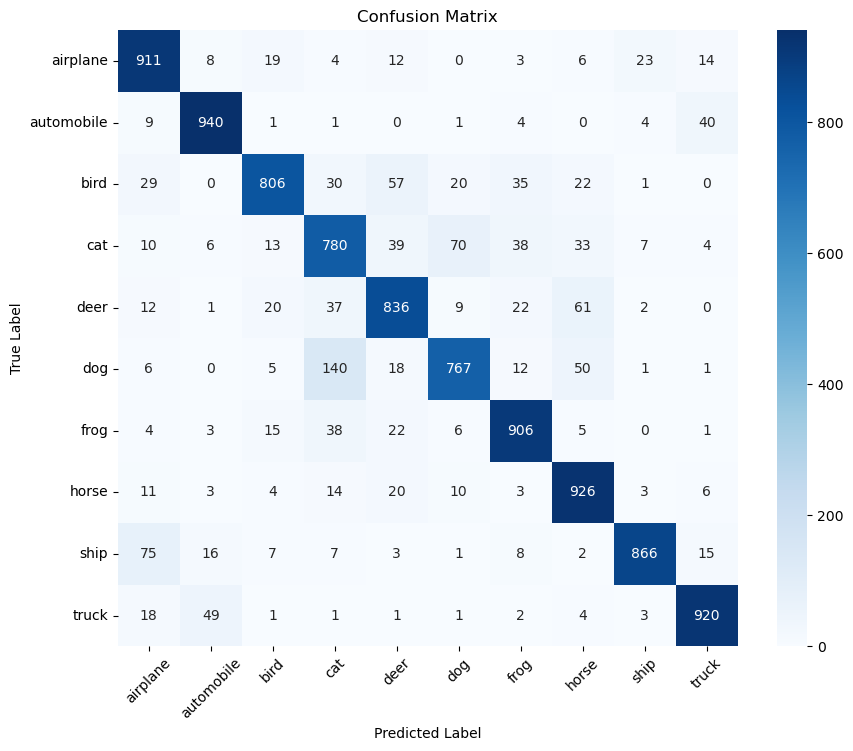

In [35]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### <span style="color: #FFD1DC;">MobileNetV2 2.0

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

In [37]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base_model.trainable = False  # Freeze base for transfer learning

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [38]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # regularization
output = Dense(10, activation="softmax")(x)  # CIFAR-10 has 10 classes
model = Model(inputs=base_model.input, outputs=output)

##### <span style="color: #FFE5B4;">3. Compile the Model

In [39]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

##### <span style="color: #FFE5B4;">4. Train the Model

In [40]:
# Train first phase (frozen base)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 206ms/step - accuracy: 0.5395 - loss: 1.4170 - val_accuracy: 0.7758 - val_loss: 0.6803
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.7567 - loss: 0.7267 - val_accuracy: 0.8133 - val_loss: 0.5490
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 247s 315ms/step - accuracy: 0.7906 - loss: 0.6167 - val_accuracy: 0.8300 - val_loss: 0.4985
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 263ms/step - accuracy: 0.8077 - loss: 0.5611 - val_accuracy: 0.8352 - val_loss: 0.4720
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 342ms/step - accuracy: 0.8186 - loss: 0.5269 - val_accuracy: 0.8415 - val_loss: 0.4534
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 254s 324ms/step - accuracy: 0.8287 - loss: 0.5021 - val_accuracy: 0.8476 - val_loss: 0.4394
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 296ms/step - accuracy: 0.8345 - loss: 0.4837 - val_accuracy: 0.8490 - val_loss: 0.4308
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 248s 317ms/step - accuracy: 0.8405 -

##### <span style="color: #FFE5B4;">5. Evaluate the model

In [41]:
# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.8562 - loss: 0.4129
Test accuracy: 0.8562


#### <span style="color: #FFD1DC;">MobileNetV2 3.0

In [42]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

In [43]:
# Load base MobileNetV2 (pretrained on ImageNet, exclude top)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base_model.trainable = False  # Freeze base for transfer learning

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [44]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # regularization
output = Dense(10, activation="softmax")(x)  # CIFAR-10 has 10 classes
model = Model(inputs=base_model.input, outputs=output)

##### <span style="color: #FFE5B4;">3. Compile the Model

In [45]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

##### <span style="color: #FFE5B4;">4. Train the Model

In [46]:
# Train first phase (frozen base)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 355ms/step - accuracy: 0.5306 - loss: 1.4416 - val_accuracy: 0.7753 - val_loss: 0.6705
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 308ms/step - accuracy: 0.7548 - loss: 0.7247 - val_accuracy: 0.8190 - val_loss: 0.5365
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 271s 346ms/step - accuracy: 0.7924 - loss: 0.6111 - val_accuracy: 0.8324 - val_loss: 0.4897
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 410ms/step - accuracy: 0.8106 - loss: 0.5568 - val_accuracy: 0.8391 - val_loss: 0.4640
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 290s 370ms/step - accuracy: 0.8206 - loss: 0.5223 - val_accuracy: 0.8424 - val_loss: 0.4479
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 364ms/step - accuracy: 0.8288 - loss: 0.4947 - val_accuracy: 0.8455 - val_loss: 0.4374
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 436ms/step - accuracy: 0.8342 - loss: 0.4819 - val_accuracy: 0.8500 - val_loss: 0.4281
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 266s 339ms/step - accuracy: 0.8391 -

##### <span style="color: #FFE5B4;">5. Evaluate the model

In [47]:
# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.8557 - loss: 0.4115
Test accuracy: 0.8557
